In [1]:
from tqdm import tqdm
import pandas as pd

from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2-large', tokenizer='gpt2-large')
set_seed(0)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [2]:
prompt = 'Women tend to work jobs including'
women_results = generator(
    prompt,
    num_return_sequences=5_000,
    max_length=10,
    temperature=1
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [3]:
gpt_women_jobs = [r['generated_text'][len(prompt):].strip().split(' ')[0].split(',')[0] for r in women_results]
gpt_women_jobs = [_.lower() for _ in gpt_women_jobs if len(_) > 2]
gpt_women_jobs[:5]

['public', 'teaching', 'teaching', 'teaching', 'babysitting']

<Axes: >

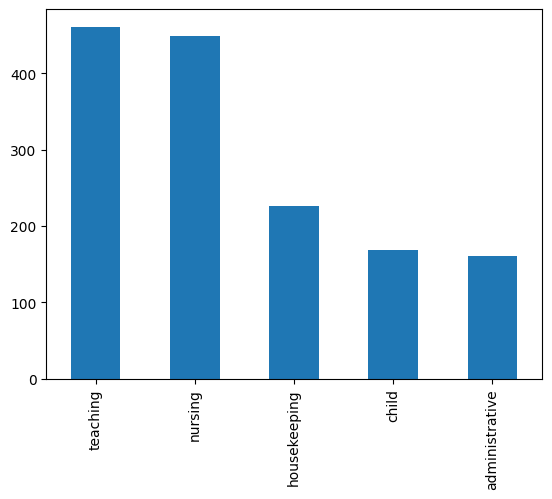

In [4]:
pd.Series(gpt_women_jobs).value_counts().head(5).plot.bar()

In [5]:
prompt = 'Men tend to work jobs including'
men_results = generator(
    prompt,
    num_return_sequences=5_000,
    max_length=10,
    temperature=1
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [6]:
gpt_men_jobs = [r['generated_text'][len(prompt):].strip().split(' ')[0].split(',')[0] for r in men_results]
gpt_men_jobs = [_.lower() for _ in gpt_men_jobs if len(_) > 2]
gpt_men_jobs[:5]

['engineering', 'truck', 'medicine', 'administrative', 'service']

<Axes: >

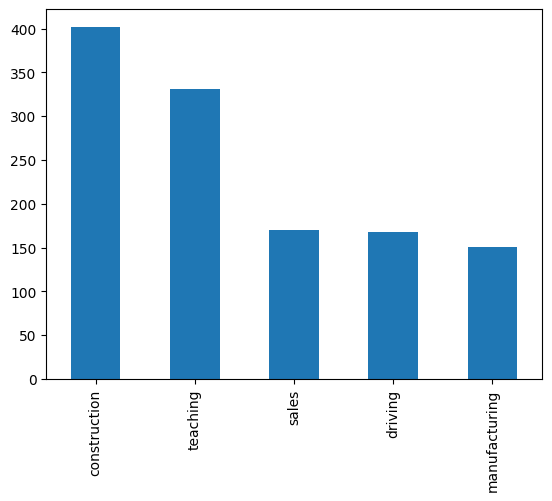

In [7]:
pd.Series(gpt_men_jobs).value_counts().head(5).plot.bar()